# OSM 2018 Economics 
## Problem Set 2
### 07.02.2018 
### Yung-Hsu Tsui*

### Exercise 1.1

In [1]:
from scipy.linalg import eigvals, norm, fractional_matrix_power
import numpy as np
import scipy as sp

X = np.loadtxt('matrix_data.txt')
E = sp.linalg.eigvals(X)
r = max(abs(E))
v = np.array(range(10))
v += 1
i = 1e+5
b = norm(fractional_matrix_power(X, i)@ v)**(1/i)
print('The difference between the r(X) and its limit is : ',abs(r-b))

The difference between the r(X) and its limit is :  3.270455073911549e-05


### Exercise 1.2

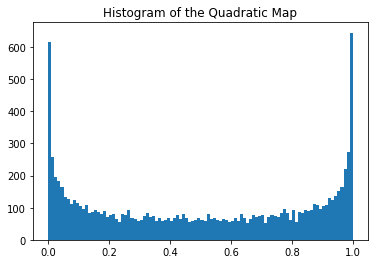

In [11]:
import random
import matplotlib.pyplot as plt

n = 100
m = 100
x = np.zeros((n * m, 1))
g = lambda x: 4 * x * (1 - x)

for i in range(n):                     # Generate one Random number set
    x0 = np.random.uniform(0.0,1.0,n)
    for j in range(m):
        t = i * m + j
        if j == 0:
            x[t] = x0[0]
        else:
            x[t] = g(x[t - 1])
plt.title("Histogram of the Quadratic Map")
plt.hist(x, bins = 100)
plt.show()

### Exercise 1.3
Prove if $(\mathbb X, g)$ is a dynamical system, $g$ is continuous at $\hat x \in \mathbb X$ and, for some $x \in \mathbb X$, $g^t(x) \to \hat x$, then $\hat x$ is a steady state of $(\mathbb X, g)$.

$Proof$:  According to Brouwer's fixed-point theorem, we know that for any continuous function f mapping a compact convex set to itself, there is a point $x_{0}$ such that $f(x_{0})=x_{0}$. Since for $x \in \mathbb X$, $g^t(x) \to \hat x$ as g is continuous, there exists a $\hat x$ is a steady state of $(\mathbb X, g)$.

### Exercise 2.1
Write your own version of a one dimensional [kernel density estimator](https://en.wikipedia.org/wiki/Kernel_density_estimation), which estimates a density from a sample.

Write it as a class that takes the data $X$ and bandwidth $h$ when initialized and provides a method $f$ such that

$$
    f(x) = \frac{1}{hn} \sum_{i=1}^n 
    K \left( \frac{x-X_i}{h} \right)
$$

For $K$ use the Gaussian kernel ($K$ is the standard normal density).

Write the class so that the bandwidth defaults to Silverman's rule (see the "rule of thumb" discussion on [this page](https://en.wikipedia.org/wiki/Kernel_density_estimation)).  Test the class you have written by going through the steps

1. simulate data $X_1, \ldots, X_n$ from distribution $\phi$
2. plot the kernel density estimate over a suitable range
2. plot the density of $\phi$ on the same figure

for distributions $\phi$ of the following types


* [beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with $\alpha = \beta = 2$
* [beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with $\alpha = 2$ and $\beta = 5$
* [beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with $\alpha = \beta = 0.5$

Use $n=100$.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from numpy import random as rand

mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

class KDE(object):

    def __init__(self, data=np.ndarray, dom = np.array([0,1]) ,bandwith=None):
        
        self.X = data
        self.dom1 = dom[0] 
        self.dom2 = dom[1]
        
        if not bandwith:
            self.h = self.compute_silv()
        else:
            self.h = bandwith
            
    def compute_silv(self):
        ''' Silverman's rule chooses optimal bandwith  '''
        sf = 1.06*np.sqrt(np.var(self.X))*(len(self.X) ** (-0.2))
        return sf

    def f(self, x):
        
        K = stats.norm.pdf
        n = len(self.X)
        
        sumK = K((x - self.X) / self.h)
        
        val = (1/(self.h*n)) * sumK.sum()
        return val
    
    def plot_density(self):
        
        grid = np.linspace(self.dom1,self.dom2,100)
        density = np.empty_like(grid)
        for i,n in enumerate(grid):
            density[i] = self.f(n)
        plt.plot(grid,density)
        plt.xlabel('Domain, 0 to 1')
        plt.ylabel('Density')

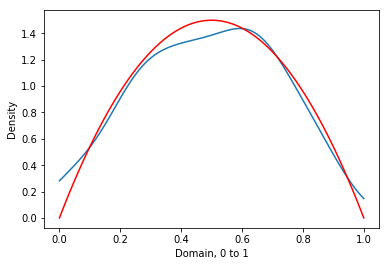

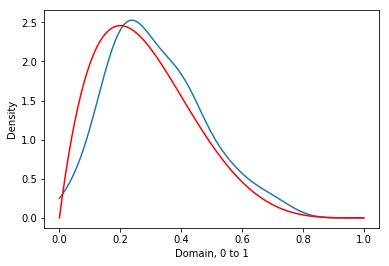

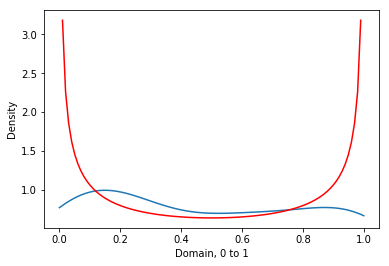

In [2]:
n = 100
grid= np.linspace(0, 1, 100)
a = np.array([0,1])
beta22 = np.random.beta(2, 2, size=(n,1))
beta25 = np.random.beta(2, 5, size=(n,1))
beta0505 = np.random.beta(0.5, 0.5, size=(n,1))

kde1 = KDE(beta22,a)
kde2 = KDE(beta25,a)
kde3 = KDE(beta0505,a)

kde1.plot_density()
plt.plot(grid, stats.beta.pdf(grid, 2, 2), 'r')
plt.show()

kde2.plot_density()
plt.plot(grid, stats.beta.pdf(grid, 2, 5), 'r')
plt.show()

kde3.plot_density()
plt.plot(grid, stats.beta.pdf(grid, 0.5, 0.5), 'r')
plt.show()

### Exercise 2.2
In class we discussed the following fact:  For the $AR(1)$ process

$$ X_{t+1} = \rho X_t + b + \sigma \xi_{t+1} $$

with $\{ \xi_t \}$ iid and standard normal, 

$$ 
    \psi_t = N(\mu, s^2) \implies \psi_{t+1} 
    = N(\rho \mu + b, \rho^2 s^2 + \sigma^2) 
$$

First, plot $\psi_t$ and $\psi_{t+1}$ using the true distributions described above.

Second, plot $\psi_{t+1}$ on the same figure (in a different color) as follows:

1. Generate $n$ draws of $X_t$ from the $N(\mu, s^2)$ distribution
2. Update them all using the rule $X_{t+1} = \rho X_t + b + \sigma \xi_{t+1}$
3. Use the resulting sample of $X_{t+1}$ values to produce a density estimate via kernel density estimation.

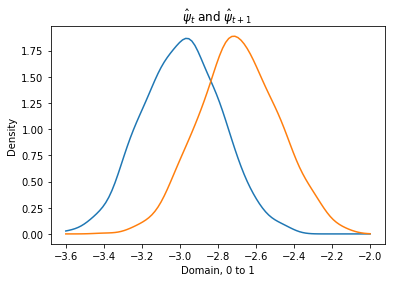

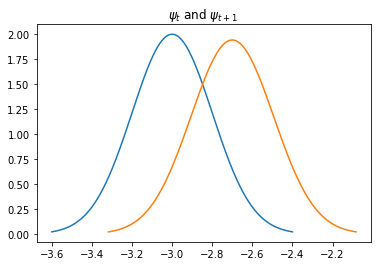

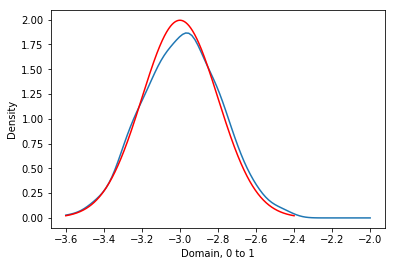

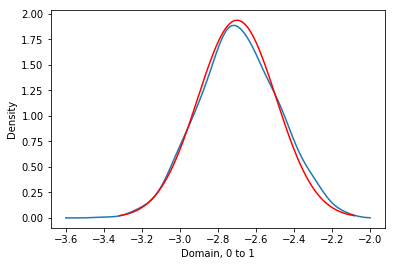

In [4]:
rho = 0.9
b = 0.0
sigma = 0.1
mu = -3.0
s = 0.2

n =2  # Number of transition
m = 1000 # number of sample in a given time period



x_dom = np.array([-3.6,-2.0])

Xi = np.random.normal(0.0, 1.0, m)
X = np.zeros((m,2))
X[:,0] = np.random.normal(mu, s, m)


X[:,1] = rho * X[:,0] + b + sigma*Xi[:]

Kestimat0 = KDE(X[:,0],x_dom)

Kestimat0.plot_density()
    
Kestimat1 = KDE(X[:,1],x_dom)

Kestimat1.plot_density()

plt.title('$ \hat{\psi}_t$ and $ \hat{\psi}_{t+1}$ ')

plt.show()

import matplotlib.mlab as mlab
import math

x = np.linspace(mu - 3*s, mu + 3*s, 1000)
y = np.linspace(rho*mu+b - 3*(np.sqrt(rho**2 * s**2 + sigma**2)), rho*mu+b + 3*(np.sqrt(rho**2 * s**2 + sigma**2)), 1000)
plt.plot(x,mlab.normpdf(x, mu, s))
plt.plot(y,mlab.normpdf(y, rho*mu+b, np.sqrt(rho**2 * s**2 + sigma**2)))
plt.title('$\psi_t$ and $\psi_{t+1}$ ')
plt.show() # Theoretical plots

Kestimat0.plot_density()
plt.plot(x,mlab.normpdf(x, mu, s),'r')

plt.show()

Kestimat1.plot_density()
plt.plot(y,mlab.normpdf(y, rho*mu+b, np.sqrt(rho**2 * s**2 + sigma**2)),'r')

plt.show()

### Exercise 2.3
In the lecture it was claimed that, for $n \times n$ matrix $A$, we have

$$ r(A) < 1 \implies A^k \to 0 $$

where convergence is in terms of the spectral norm.  

Prove this using Gelfand's formula.

$Proof$:  By Gelfand's formula, $\forall$ $\epsilon > 0$, $\exists N \in \mathbb{N}$   s.t $\forall k > N$ , such that |$|A^{k}|^{\frac{1}{k}} - r(A)$| < $\epsilon$,

Thus，by inequality, $ (-\epsilon + r(A) )^{k} < || A^{k} || < (-\epsilon + r(A) )^{k} $. 

If $ k \rightarrow \infty$ ,and $\epsilon$ is small, then $\lim || A^{k} || = \lim r^{k}(A) = 0 $.

### Exercise 3.1

Compute and plot the stationary distribution of the matrix using one of the methods in `quantecon`'s `MarkovChain` object, combined with `matplotlib`.

Text(0.5,1,'Stationary Distribution')

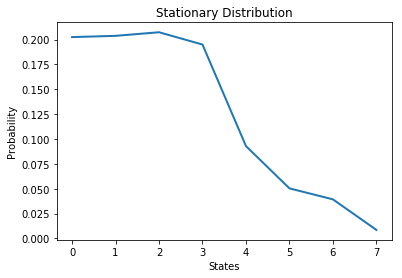

In [11]:
import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt
from numpy import linalg as LA

P = np.array([[0.222, 0.222, 0.215, 0.187, 0.081, 0.038, 0.029, 0.006],
     [0.221, 0.220, 0.215, 0.188, 0.082, 0.039, 0.029, 0.006],
     [0.207, 0.209, 0.210, 0.194, 0.090, 0.046, 0.036, 0.008],
     [0.198, 0.201, 0.207, 0.198, 0.095, 0.052, 0.040, 0.009],
     [0.175, 0.178, 0.197, 0.207, 0.110, 0.067, 0.054, 0.012],
     [0.182, 0.184, 0.200, 0.205, 0.106, 0.062, 0.050, 0.011],
     [0.123, 0.125, 0.166, 0.216, 0.141, 0.114, 0.094, 0.021],
     [0.084, 0.084, 0.142, 0.228, 0.170, 0.143, 0.121, 0.028]])

Station_P=LA.matrix_power(P, 10000)
Station_dist = Station_P[1,:]
plt.plot(Station_dist,LineWidth = 2)
plt.xlabel('States')
plt.ylabel('Probability')
plt.title('Stationary Distribution')

### Exercise 3.2

This Markov chain is asymptotically stationary and ergodic, which means that, for any sample path $\{X_t\}$ generated according to $P$, we have

$$ \lim_{n \to \infty} \frac{1}{n} \sum_{t=1}^n \mathbb 1\{X_t = j\} = \psi(j) $$

where $\psi$ is the stationary distribution and $j$ is an integer between 0 and 7 (the set of possible states).

Use this fact to compute an approximation to the stationary distribution $\psi$.  Confirm visually that your result is similar to the stationary distribution you computed in exercise 1.

You can make use of the `simulate` method in `MarkovChain`.

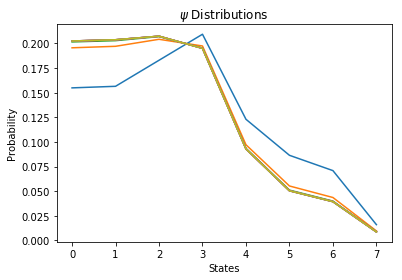

Difference between distributions [-6.36858516e-09 -6.11067522e-09 -2.88753021e-09  2.22907770e-09
  3.91003292e-09  4.45507260e-09  3.86474493e-09  9.07927355e-10]


In [15]:
p = np.arange(8) + 1
norm_p = p/sum(p)

for i in range(9):
    norm_p = norm_p @ P
    plt.plot(norm_p, label = str(i))
    

plt.xlabel('States')
plt.ylabel('Probability')
plt.title('$\psi$ Distributions ')
plt.show()    

print('Difference between distributions', norm_p - Station_dist)

### Exercise 3

Ergodicity also implies that, if we simulate a large number of paths and then look at the cross section at some $T$, where $T$ is suitably large, then the empirical distribution should be close to the stationary distribution.

Confirm this by simulation and visual inspection, as above.

(In this context, the empirical distribution of a sample is the fraction of observations that take value $j$ for each $j$ in $0, \ldots, 7$.)

Cross-sectional distribution is the same with the longitudinal mean!


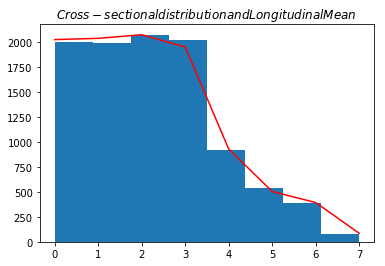

In [17]:
import random

# We are gonna compare the 10,000 cross-sectional sample in one time, and 10,000 longitudinal sample of one household 
# to confirm that this stochastic processes satisfy Ergodicity!

N = 10000
T  = 1000


X = np.zeros([N,T])+2
#X[:,0] = np.random.uniform(0.0,1.0,n)

for i in range(T-1):

    
    for n in range(N):
        draw = np.random.uniform(0.0,1.0,1)
        for j in range(8):
        
            if X[n,i] == j:
            
                if  P[j,0] > draw:
                    X[n,i+1] = 0
                elif (P[j,0]+P[j,1]> draw) & (P[j,0]< draw):      
                    X[n,i+1] = 1
                elif (P[j,0]+P[j,1]+P[j,2]> draw) & (P[j,0]+P[j,1] < draw):   
                    X[n,i+1] = 2
                elif (P[j,0]+P[j,1]+P[j,2]+P[j,3]> draw) & (P[j,0]+P[j,1]+P[j,2] < draw):    
                    X[n,i+1] = 3
                elif (P[j,0]+P[j,1]+P[j,2]+P[j,3]+P[j,4]> draw) & (P[j,0]+P[j,1]+P[j,2]+P[j,3] < draw):    
                    X[n,i+1] = 4
                elif (P[j,0]+P[j,1]+P[j,2]+P[j,3]+P[j,4]+P[j,5]> draw) & (P[j,0]+P[j,1]+P[j,2]+P[j,3]+P[j,4] < draw):    
                    X[n,i+1] = 5
                elif (P[j,0]+P[j,1]+P[j,2]+P[j,3]+P[j,4]+P[j,5]+P[j,6]> draw) & (P[j,0]+P[j,1]+P[j,2]+P[j,3]+P[j,4]+P[j,5] < draw):    
                    X[n,i+1] = 6
                elif (P[j,0]+P[j,1]+P[j,2]+P[j,3]+P[j,4]+P[j,5]+P[j,6]+P[j,7]> draw) & (P[j,0]+P[j,1]+P[j,2]+P[j,3]+P[j,4]+P[j,5]+P[j,6] < draw):    
                    X[n,i+1] = 7


plt.hist(X[:,-1],8, label = 'Cross-Sectional Mean')
plt.plot(np.array([0,1,2,3,4,5,6,7]),  N*Station_dist,c ='r', label = 'Longitudinal Mean')
plt.title('$Cross-sectional distribution and Longitudinal Mean$ ')
print('Cross-sectional distribution is the same with the longitudinal mean!')